# Introduction
In our last lesson, we came across the concept of hash collision, which arises when multiple items end up sharing the same hash address.

Thus, we need effective collision resolution methods.

There are two main strategies for addressing hash collisions:

- Open Hashing
- Closed Hashing


## Open Hashing
Open Hashing, also known as separate chaining, tackles collisions by providing additional space to store collided elements.

This method involves creating linked lists, where each linked list 

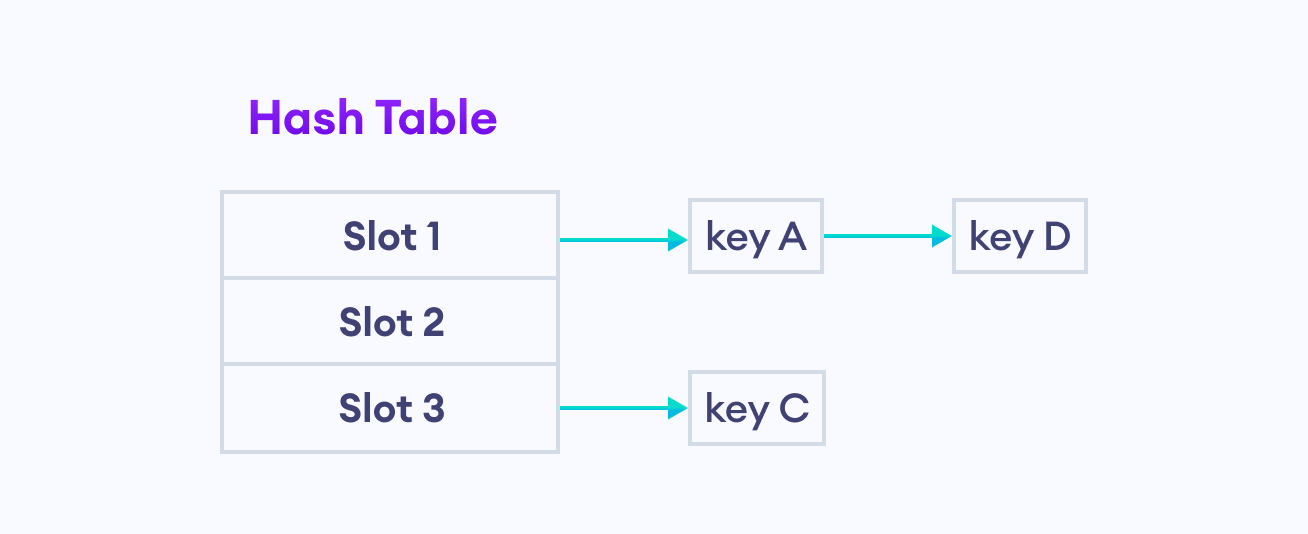

In the above figure,

- The hash table contains multiple slots.
- Each slot has a linked list of keys.


### Chaining
Hash collisions can occur when multiple keys are mapped to the same position in a hash table.

One effective method to address this issue is through open hashing, specifically by employing a technique called **chaining**.

Chaining involves linking multiple values that hash to the same location, creating a chain of elements within the hash table.

Let's explore chaining with a concrete example using the above dataset:

>12, 14, 2, 6, 9, 35

To begin, we'll hash each of these numbers using a modulus hash function. For this example, we'll assume a hash table size of 12.

The hash function used is:

>H(x) = x % 12

Notice that two of these numbers—14 and 2—hash to the same index, which is index 2.

Let's see how chaining addresses this collision.



### Working of Chaining
1. Insert into the hash table.

In chaining, rather than directly storing values in the hash table, we create sorted linked lists at each index to manage collisions.

Values that hash to the same index are added to the linked list at that index.

Here's a visual representation:

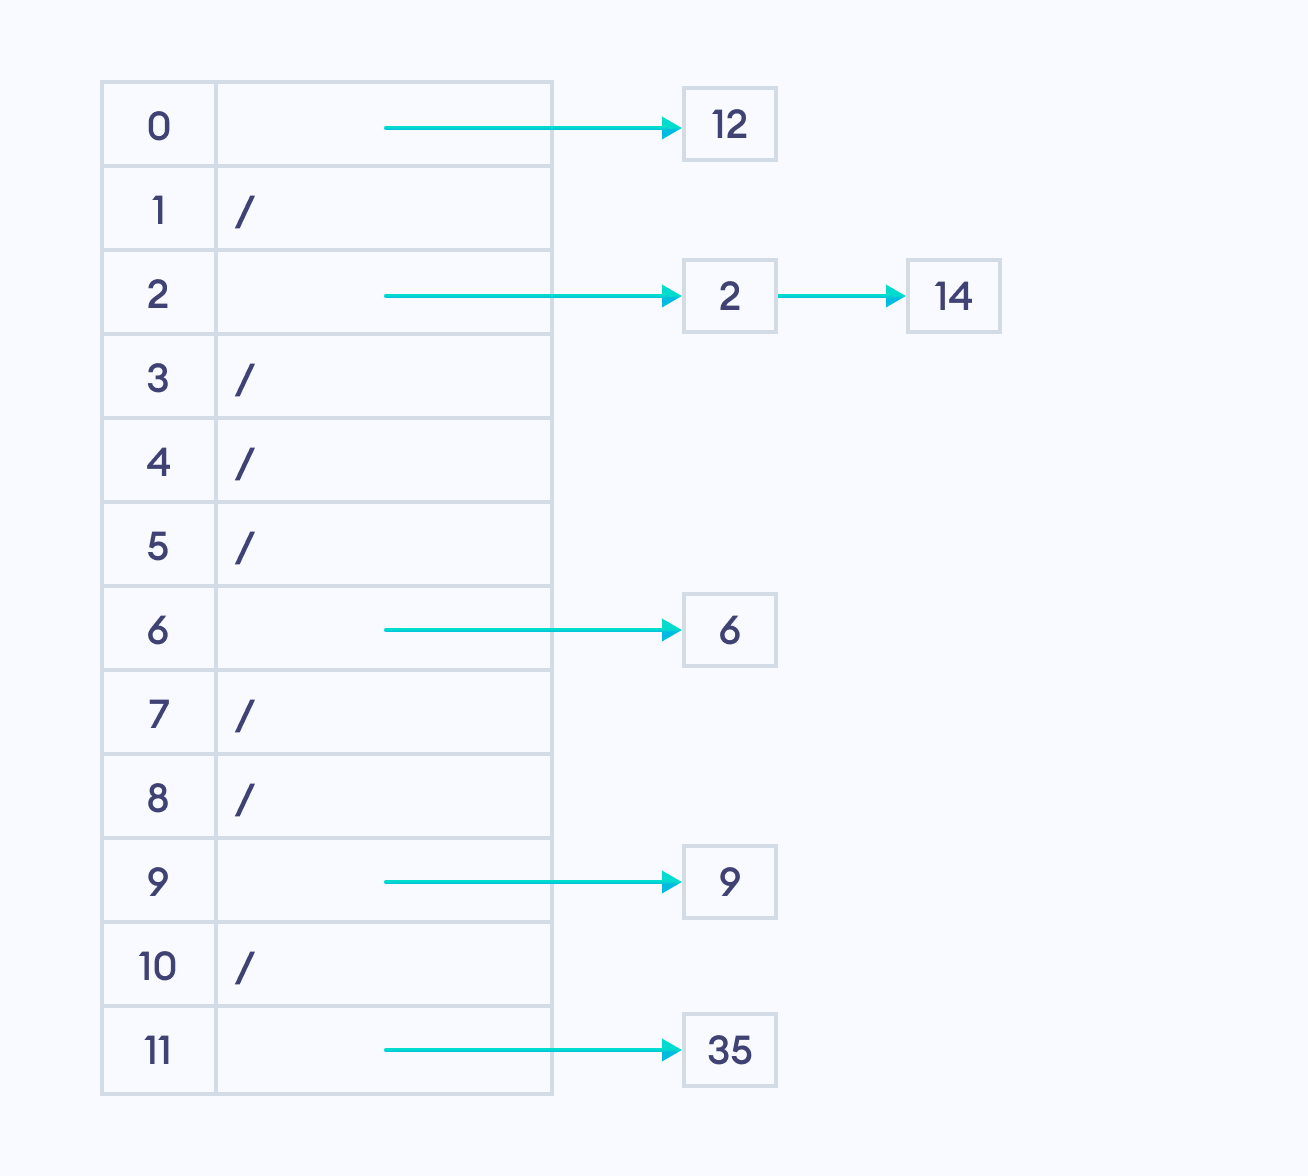

2. Retrieve from the hash table.

When retrieving a value, the process remains intuitive.

Suppose we're searching for the key 14.

>H(14)= 14 % 12 = 2 

Hence, we search at index 2.

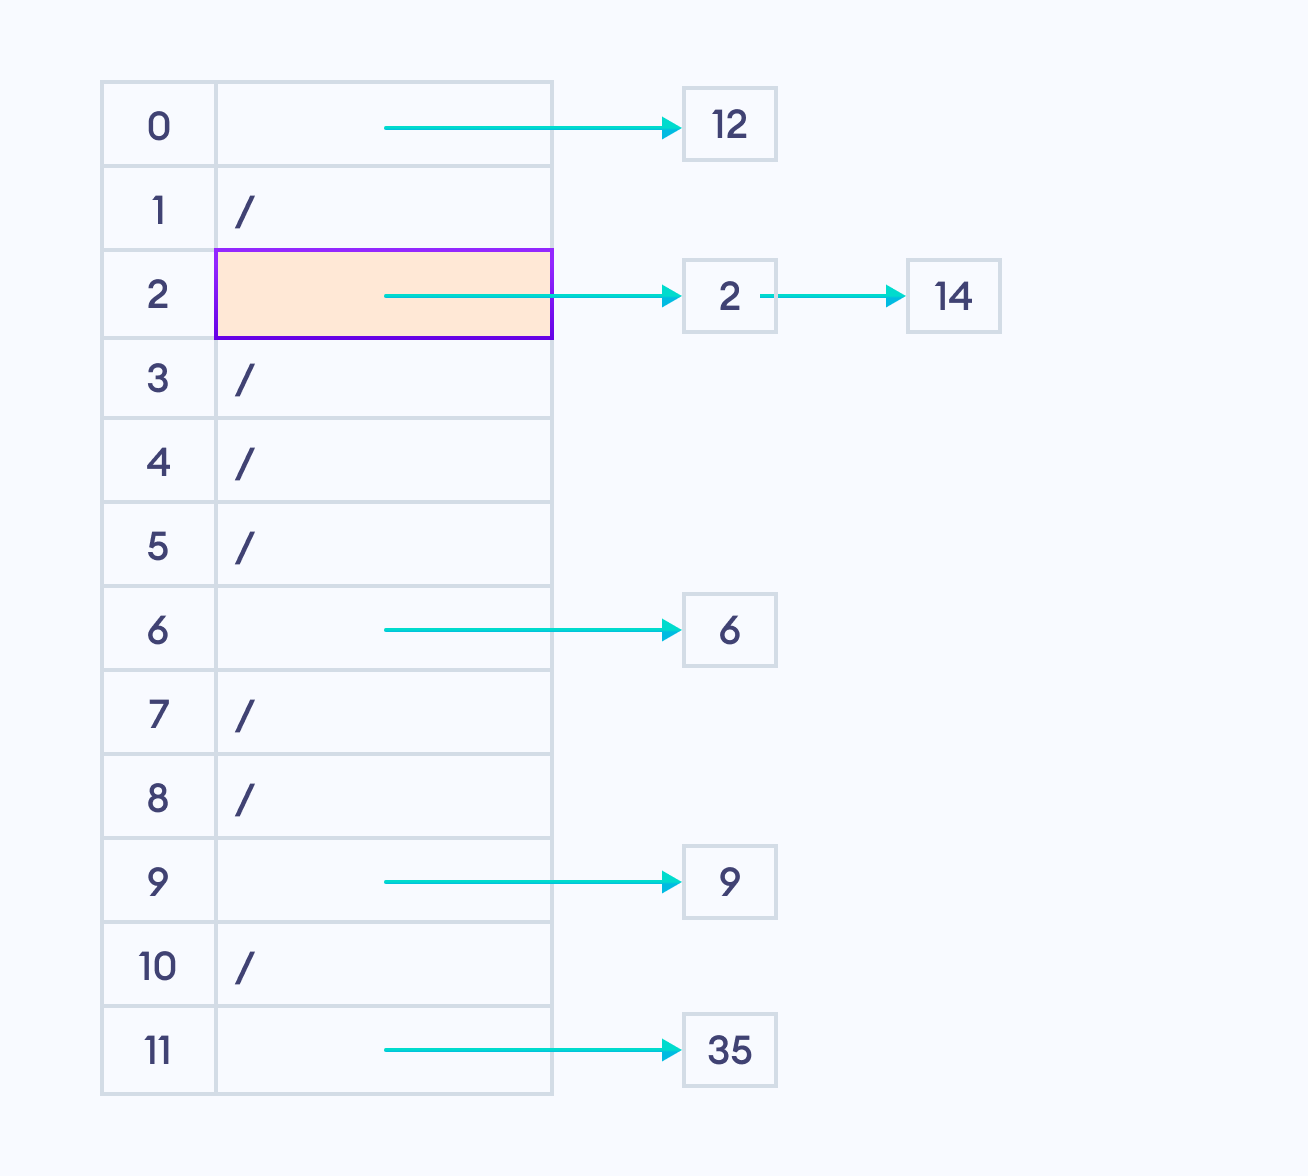

We then traverse the linked list at index 2 to locate the desired value.

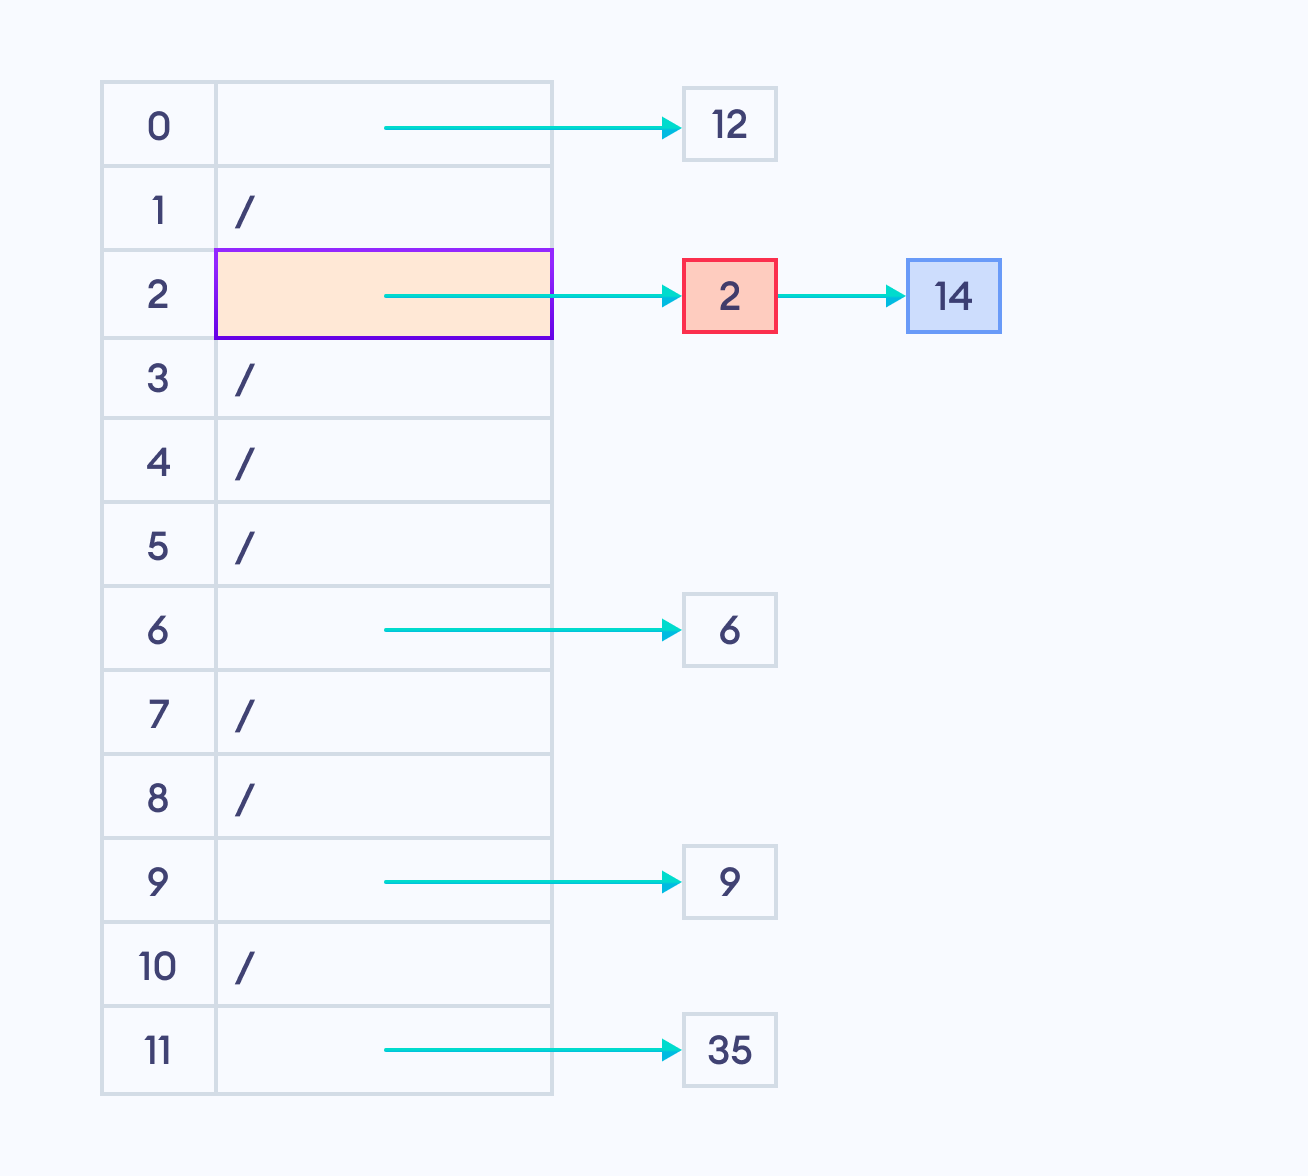

3. Delete from the hash table.

Deleting a value follows a similar process. Let's say we're deleting the value 14. We hash 14 and identify its index as 2. Subsequently, we traverse the linked list at index 2 to find the value and proceed with deletion.

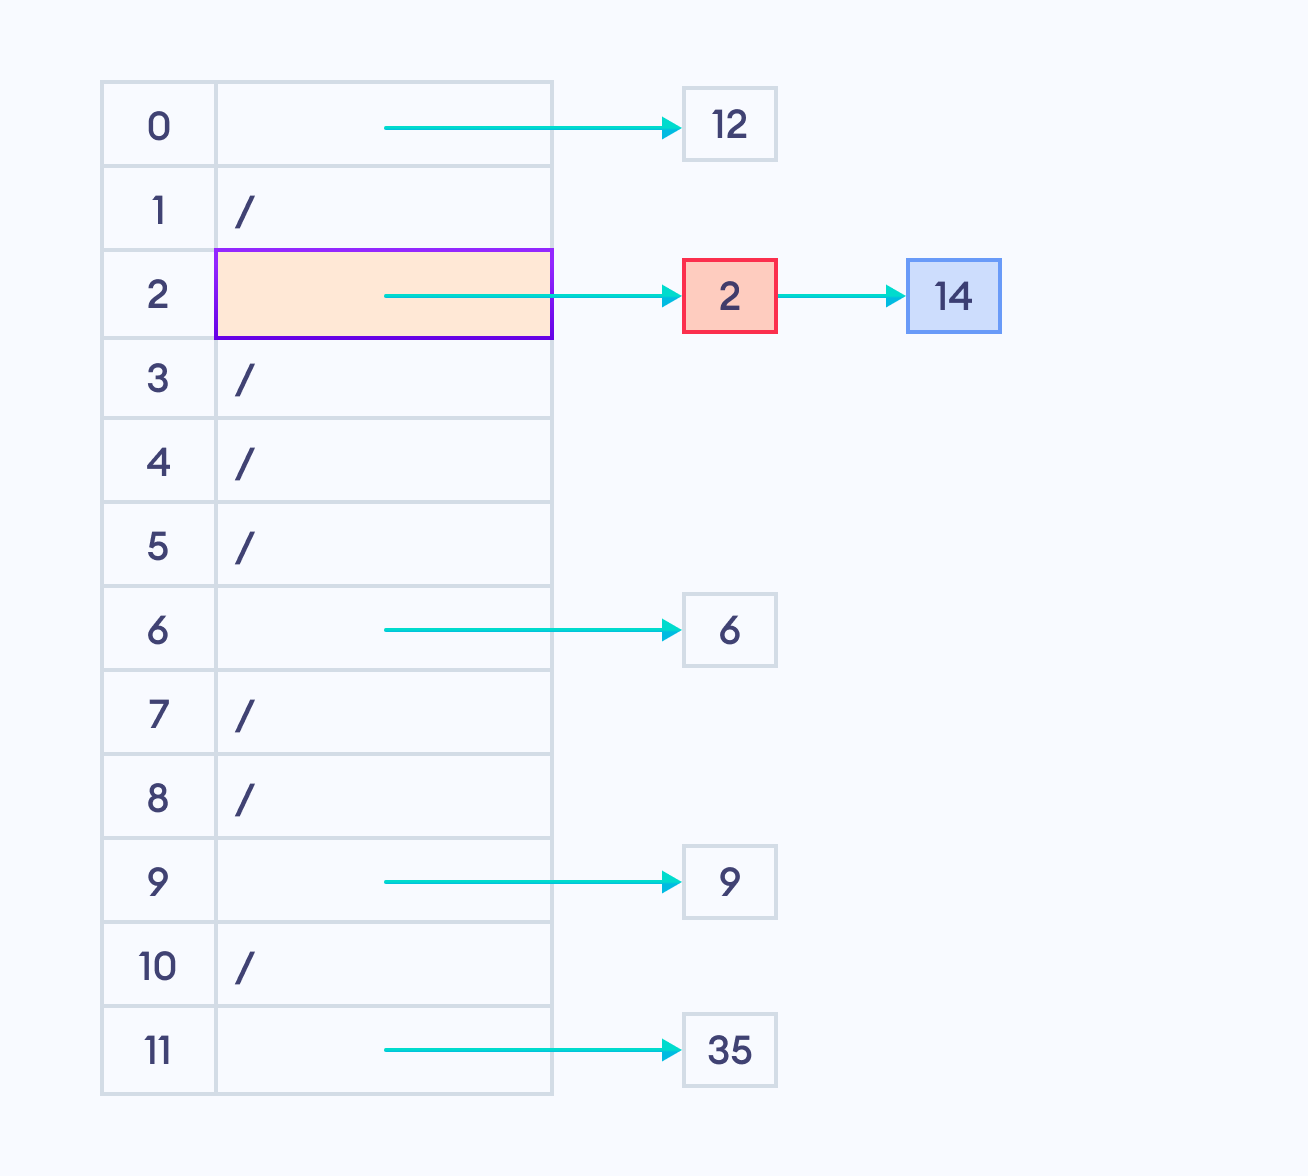

We have already learned about how deletion occurs in a linked list.

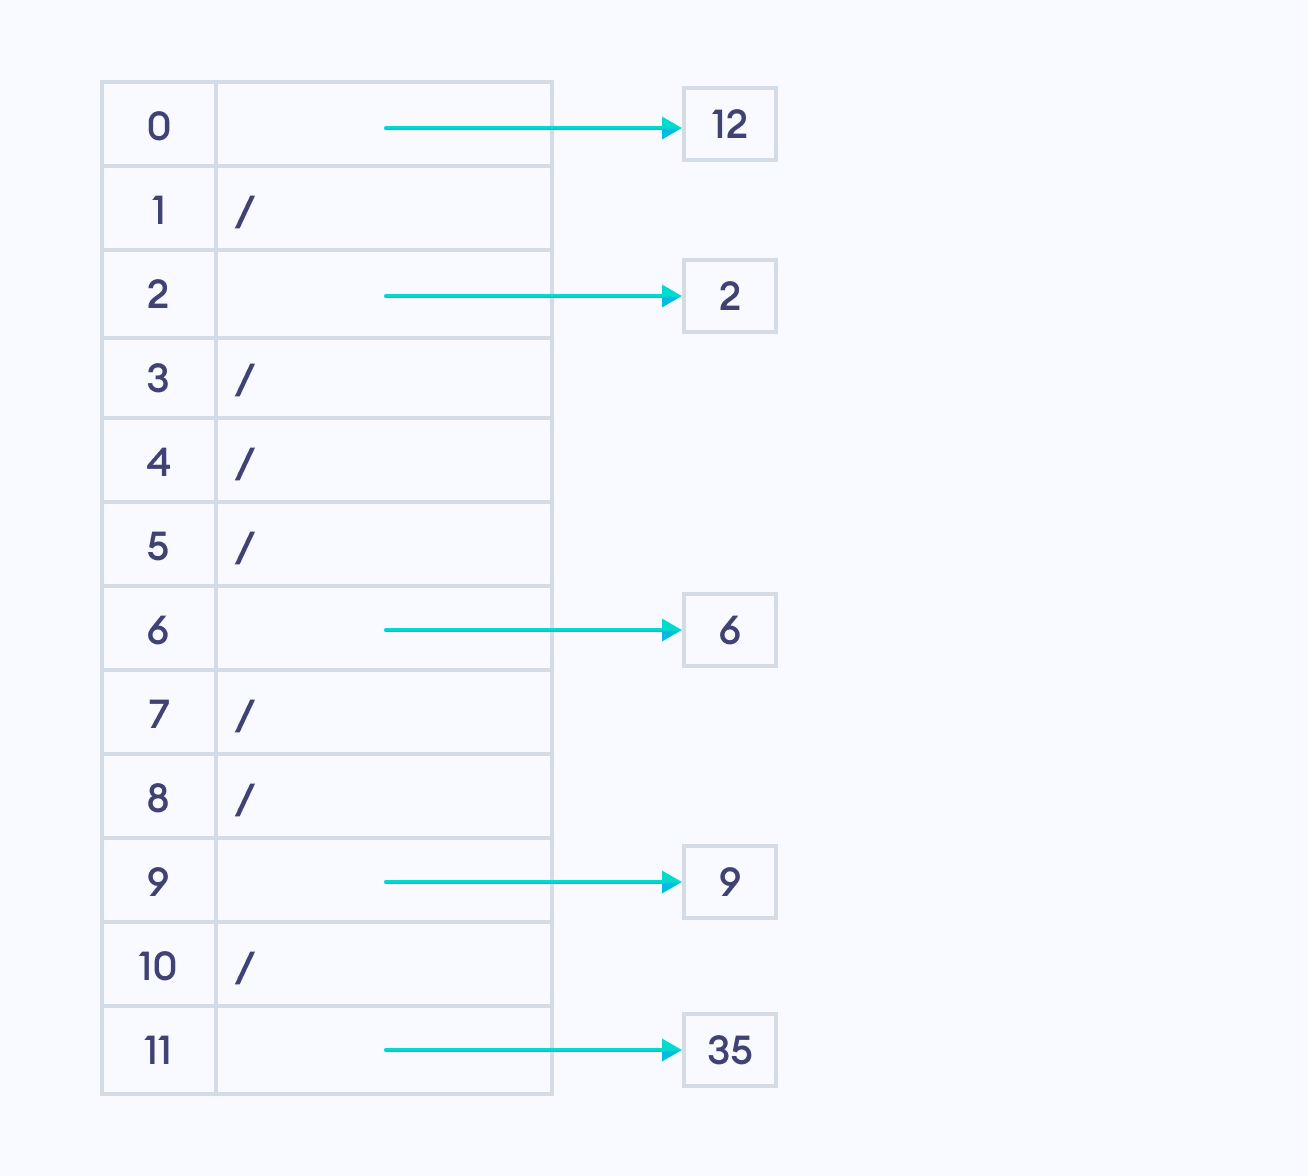

In this lesson, we do not deal with deletions. We only deal with insertion (hashing) and retrieval (searching) operations in Hash Tables.



### Thought Process: Chaining
Let's dive into the Python implementation of the Chaining technique for handling hash collisions.

1. Hashing the Numbers.

We begin with the hashing function, which remains unchanged. We use the modulus hashing technique.

```python
def H(self, key):
    return key % self.size
```
As always, hashing takes a constant time O(1).

2. Implementing Chaining.

The core aspect of chaining involves maintaining a sorted linked list (here, we are using Python list) at each slot.

```python
def insert(self, value):
    key = self.H(value)
    if self.table[key] is None:
        self.table[key] = [value]
    else:
        self.table[key].append(value)
        self.table[key] = sorted(self.table[key])
```

Initially, when a slot is empty, we create a list with the new value:

```python
if self.table[key] is None:
    self.table[key] = [value]
```    

Once a slot has values, when a new value is addressed to the linked list, we append the new value to the end of the list and sort the list:

```python
self.table[key].append(value)
self.table[key] = sorted(self.table[key])
```
3. Retrieving the values.

When retrieving values, we hash the value to determine its position in the hash table. We then traverse the linked list to find the desired value.

```python
def retrieve(self, value):
    # find the corresponding list for the value
    key = self.H(value)
    value_list = self.table[key]
    # traverse the list to find the value
    if value_list is not None:
        for val in value_list:
            if val == value:
                # return the value if it exists
                return val
    # otherwise return None
    return None
```

In [1]:
# Chaining
class ChainingHashTable:

    def __init__(self, size=12):
        self.size = size
        self.table = [None] * self.size

    def H(self, key):
        return key % self.size

    def insert(self, value):
        key = self.H(value)
        if self.table[key] is None:
            self.table[key] = [value]
        else:
            self.table[key].append(value)
            self.table[key] = sorted(self.table[key])

    def display(self):
        for key, value_list in enumerate(self.table):
            print(f'Index {key}: {value_list}')

    def retrieve(self, value):
        key = self.H(value)
        value_list = self.table[key]
        if value_list is not None:
            for val in value_list:
                if val == value:
                    return val
        return None

elements = [12, 14, 2, 6, 9, 35]
hash_table = ChainingHashTable()
for element in elements:
    hash_table.insert(element)

hash_table.display()
print(f'\nRetrieved Value: {hash_table.retrieve(14)}')

Index 0: [12]
Index 1: None
Index 2: [2, 14]
Index 3: None
Index 4: None
Index 5: None
Index 6: [6]
Index 7: None
Index 8: None
Index 9: [9]
Index 10: None
Index 11: [35]

Retrieved Value: 14


# Time Complexity
On average, retrieval function has a time complexity of O(ʎ).

where,

```ʎ```: load factor

A successful retrieval takes around ```1 + ʎ/2``` time whereas a failed retrieval takes an average of ```1 + ʎ``` time.

---

### Closed Hashing
Closed hashing, also called open addressing, resolves collisions by finding alternative locations within the existing hash table for collided elements.

Instead of allocating additional space, closed hashing aims to fit all elements within the same hash table structure.

There are several closed hashing strategies that we will explore in this lesson. They are:

- Linear Probing
- Quadratic Probing
- Double Hashing


### Linear Probing
Linear probing is a strategy of closed hashing.

This technique operates with a direct and sequential approach to handle hash collisions.

When a collision occurs, linear probing searches for the next available slot in the hash table, moving linearly until an empty slot is found.

The objective is to find the closest unoccupied position for the colliding item.

Let's continue using the same example dataset:

> 12, 14, 2, 6, 9, 35


### Working of Linear Probing
#### Insert into hash table

For this example, we'll use the same hash function:

> H(x) = x % 12

The numbers are hashed as follows:

>Hashing 12 = 12 % 12 = 0</p>
>Hashing 14 = 14 % 12 = 2 </p>

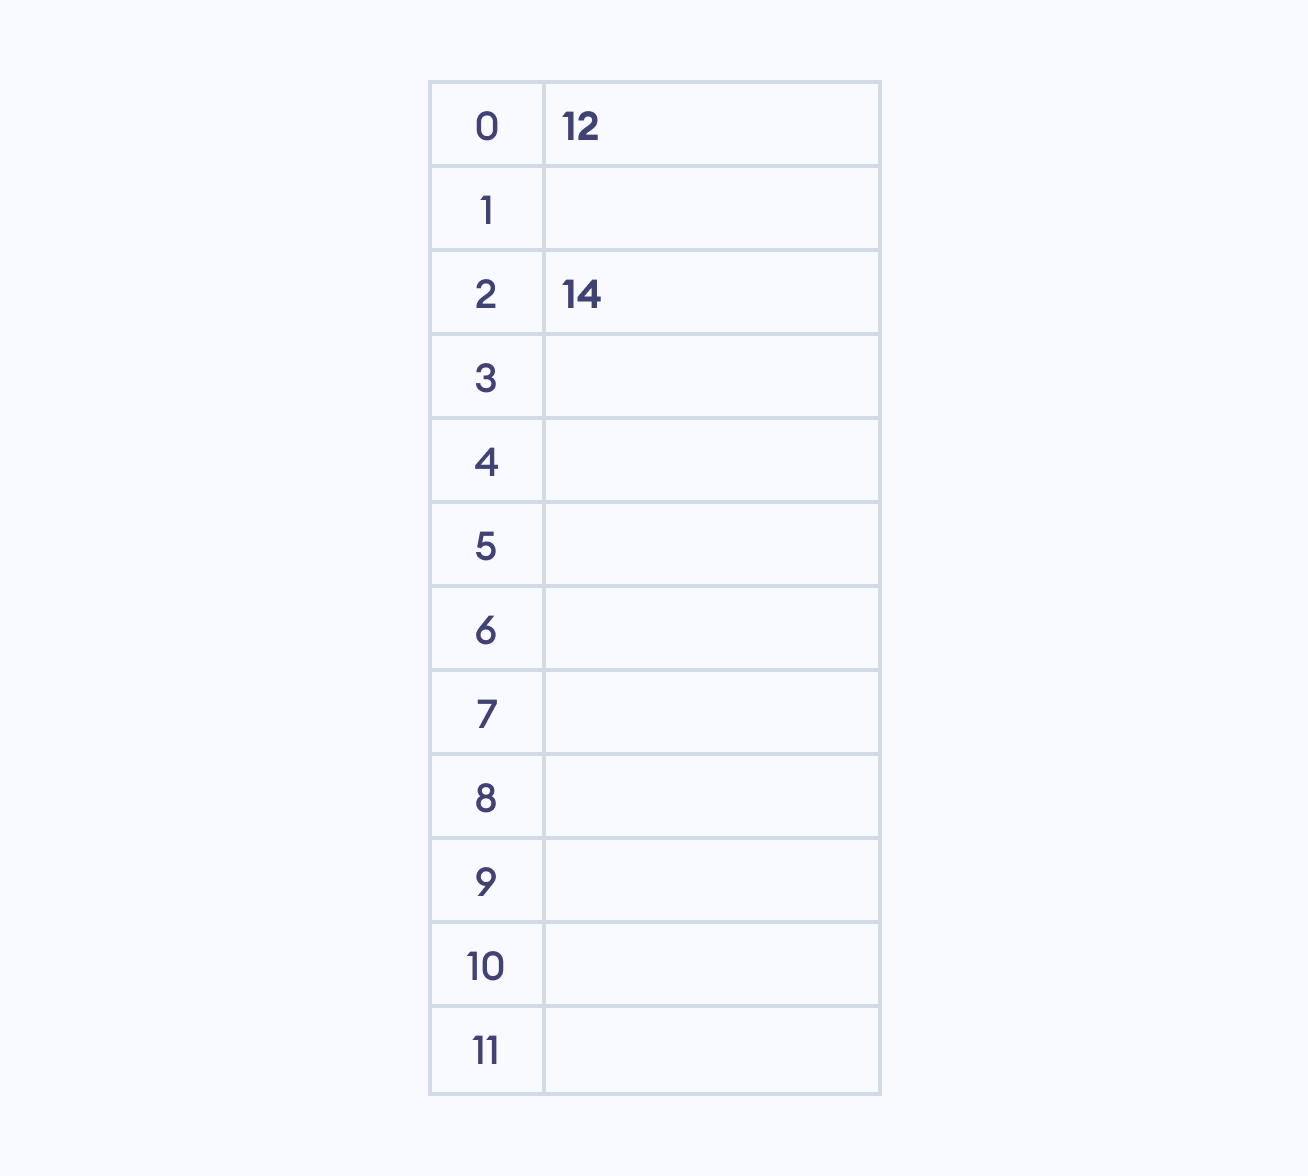

>Hashing 2 = 2 % 12 = 2 (Collision) </p>
>Hashing 2 with linear probing = ( 2 + 1) % 12 = 3 </p>

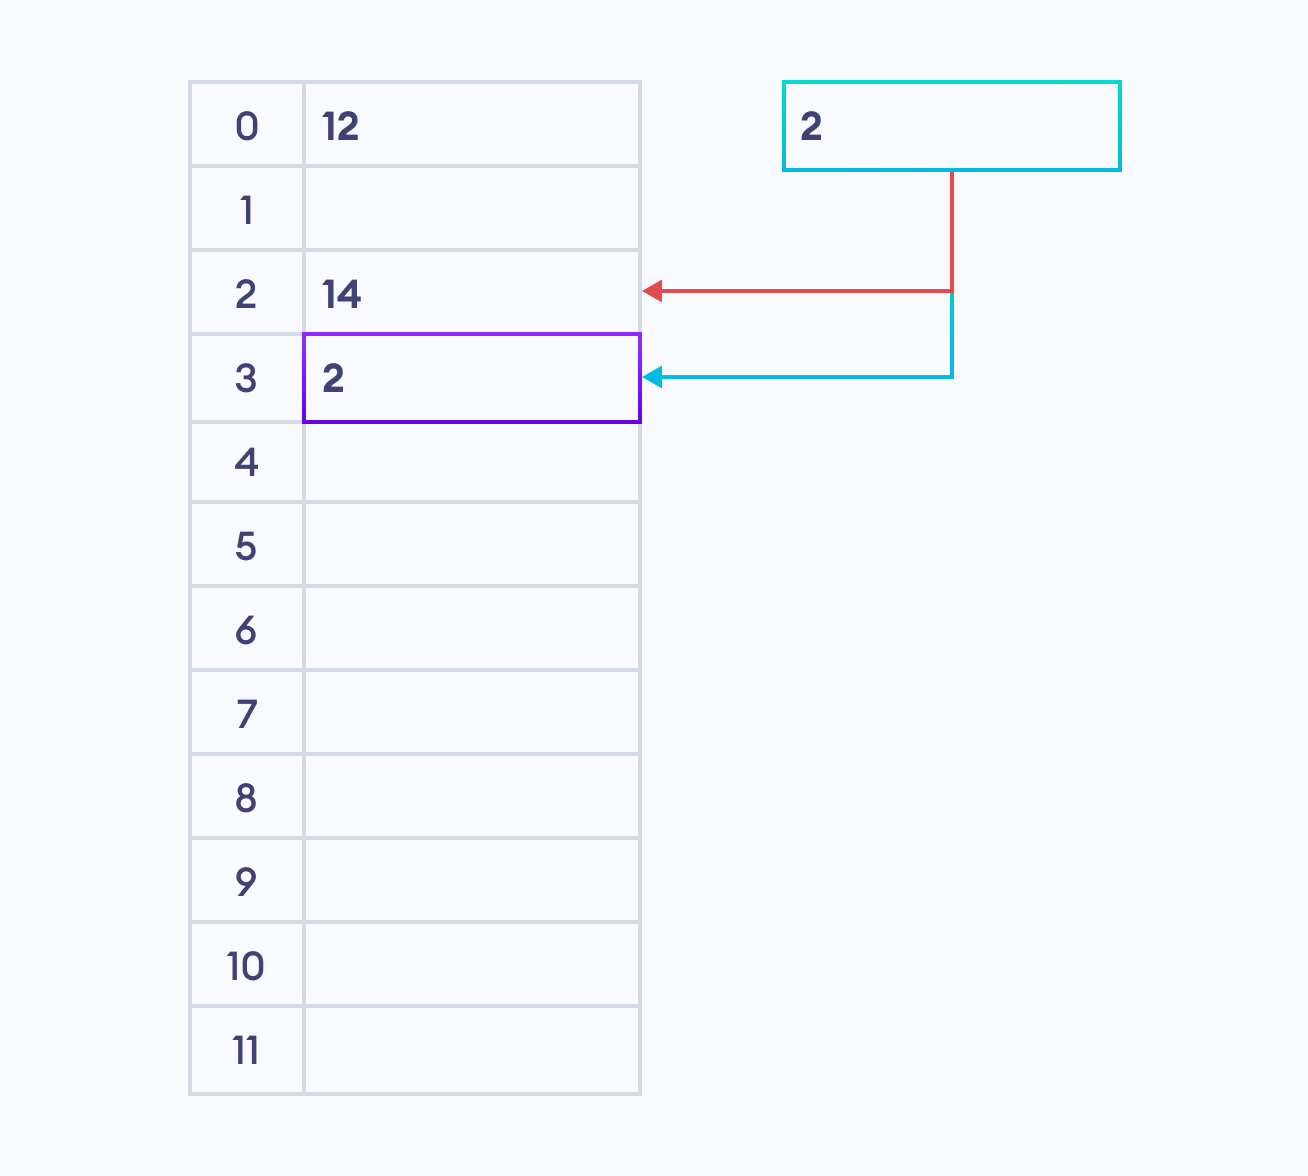

>Hashing 6 = 6 % 12 = 6 </p>
>Hashing 9 = 9 % 12 = 9 </p>
>Hashing 35 = 35 % 12 = 11 </p>

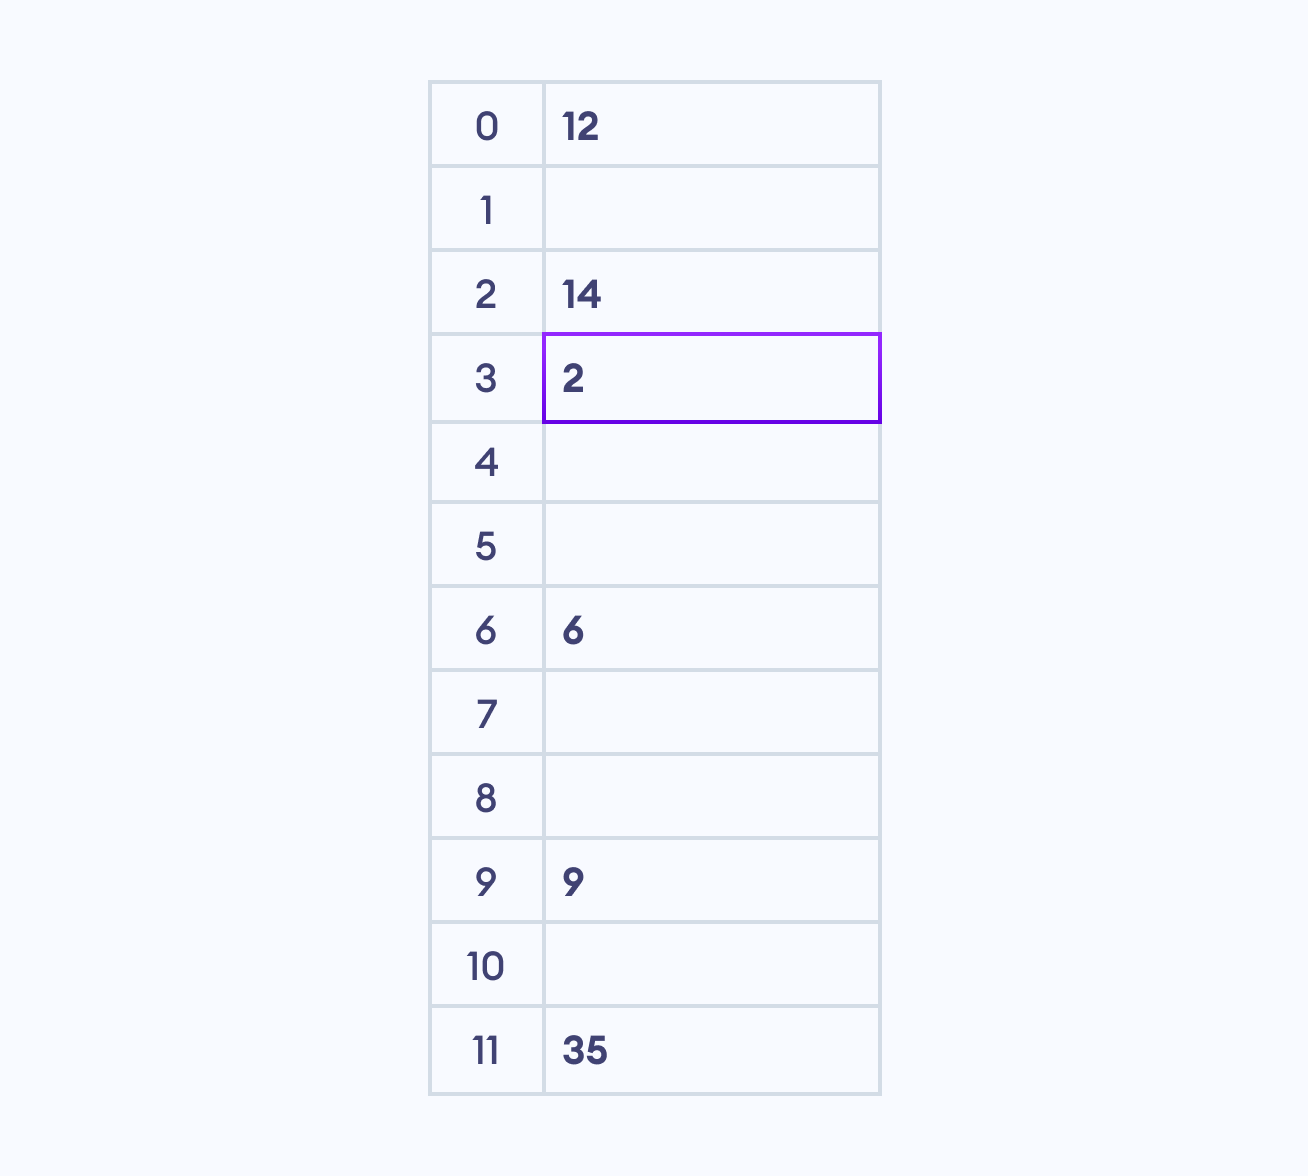


#### Retrieve from hash

When retrieving a value, linear probing employs a similar process.

If the desired value is found at its expected index, it's directly returned.

However, if the value isn't located at the expected index due to probing, the algorithm traverses through successive positions until it finds an empty slot or the target value.

Consider searching for 2.

We first hash and find that the expected index is 2.

```2 % 12 = 2```

Since, we don't find 2 at index 2, we traverse to the next position.

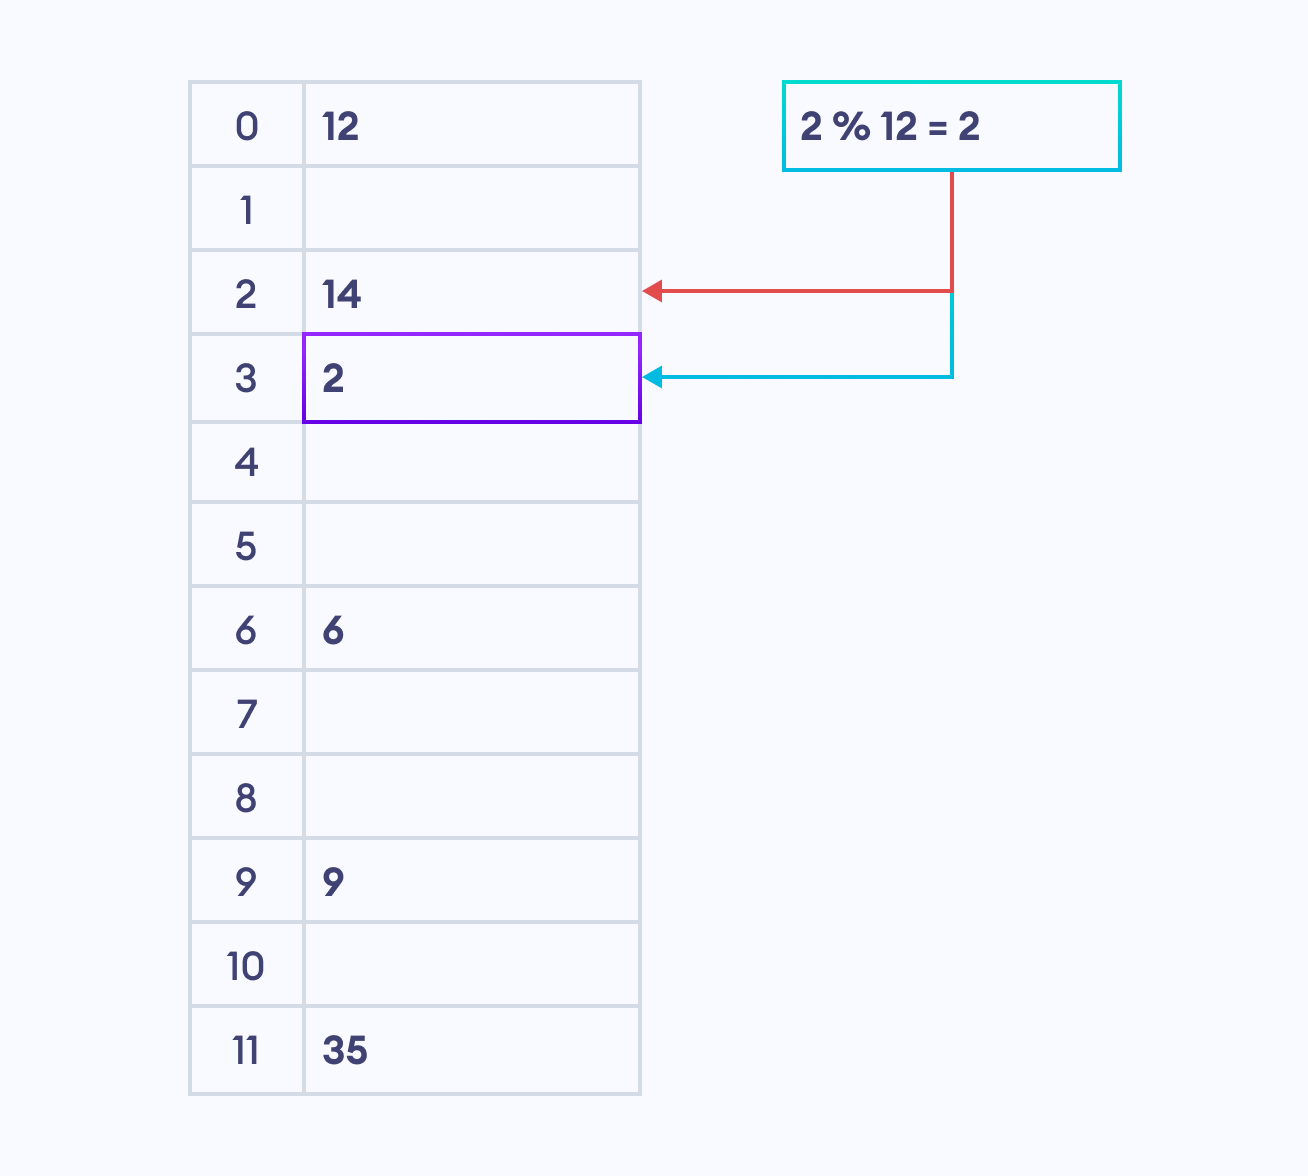

We find 2 at index 3.

In this way, we can retrieve values in linear probing.

### Limitations of Linear Probing
While linear probing offers a simple approach to handle hash collisions, it comes with following limitations:

- Difficulty in deleting values
- Primary clustering


In [ ]:
# Linear Probing
class LinearProbingHashTable:

    def __init__(self, size=12):
        self.size = size
        self.table = [None] * self.size

    def H(self, value, i):
        return (value + i) % self.size

    def insert(self, value):
        i = 0
        key = self.H(value, i)
        while self.table[key] is not None:
            i += 1
            key = self.H(value, i)
        self.table[key] = value

    def retrieve(self, value):
        i = 0
        key = self.H(value, i)
        while self.table[key] is not None:
            if self.table[key] == value:
                return value
            i += 1
            key = self.H(value, i)
        return None
    def display(self):
        for key, value in enumerate(self.table):
            print(f'Index {key}: {value}')

elements = [12, 14, 2, 6, 9, 35]
hash_table = LinearProbingHashTable()
for element in elements:
    hash_table.insert(element)
hash_table.display()
print(f'Retrieved Value: {hash_table.retrieve(2)}')

### Quadratic Probing
We saw that in linear probing, if there are a lot of collisions in a small area, it can dramatically increase search time.

Since the core concept behind hashing is constant search time, linear probing might lose its integrity as a hashing technique. To overcome this, we use quadratic probing.

When collisions occur, quadratic probing employs a quadratic equation to allow items to be placed at more dispersed positions compared to linear probing.

For example, a hash function used in quadratic probing can be:

>H(x) = (x + i^2) % table size

where,

`i` = 0, 1, 2, 3

This equation increments the probing index by quadratic terms `i^2`.



In [2]:
# Quadratic Probing
class QuadraticProbing:
 
    def __init__(self, size=12):
        self.size = size
        self.table = [None] * self.size
 
    def H(self, value, i):
        return (value + i*i) % self.size
 
    def insert(self, value):
        i = 0
        key = self.H(value, i)
        while self.table[key] is not None:
            i += 1
            key = self.H(value, i)
        self.table[key] = value
 
    def retrieve(self, value):
        i = 0
        key = self.H(value, i)
        while self.table[key] is not None:
            if self.table[key] == value:
                return value
            i += 1
            key = self.H(value, i)
        return None
    def display(self):
        for key, value in enumerate(self.table):
            print(f'Index {key}: {value}')
 
elements = [12, 14, 2, 6, 9, 26]
hash_table = QuadraticProbing()
for element in elements:
    hash_table.insert(element)
hash_table.display()
print(f'Retrieved Value: {hash_table.retrieve(2)}')


Index 0: 12
Index 1: None
Index 2: 14
Index 3: 2
Index 4: None
Index 5: None
Index 6: 6
Index 7: None
Index 8: None
Index 9: 9
Index 10: None
Index 11: 26
Retrieved Value: 2


### Double Hashing
When collisions occur in linear probing or quadratic probing, clusters of items can still form, leading to search time inefficiencies.

Double hashing provides a unique solution to this problem by employing two different hash functions to calculate the step size for probing. This approach helps create a more diverse pattern for placing colliding values.

In double hashing two hash functions are used to determine the probing sequence. The primary hash function calculates the initial index, while the secondary hash function determines the step size for probing.

Double hash function:

>H(x) = (H1(x) + i * H2(x)) % table size

where,

- i = 0, 1, 2, …
- H1(x) = primary hash function
- H2(x) = secondary hash function

The second hash function can be anything you like. However, you must meet two conditions:

1. `H2(x)` should never be zero.

2. `H2(x)` should cover all remaining cells.

When double hashing a modulus hash, our second function generally takes the form of:

>H2(x) = n - x % n

or

>H2(x) = 1 + x % (n - 1)


In [3]:
# Double Hashing
class DoubleHashing:
 
    def __init__(self, size=14):
        self.size = size
        self.table = [None] * self.size
    
    def H1(self, value):
        return value % self.size
         
    def H2(self, value):
        return 1 + value % (self.size - 1)
    
    def H(self, value, i):
        return (self.H1(value) + i * self.H2(value)) % self.size
   
    def insert(self, value):
        i = 0
        key = self.H(value, i)
        while self.table[key] is not None:
            i += 1
            key = self.H(value, i)
        self.table[key] = value
 
    def retrieve(self, value):
        i = 0
        key = self.H(value, i)
        while self.table[key] is not None:
            if self.table[key] == value:
                # return the key where the value is found
                return key  
            i += 1
            key = self.H(value, i)
        return None
        
    def display(self):
        for key, value in enumerate(self.table):
                print(f'Index {key}: {value}')
 
elements = [12, 14, 2, 6, 9, 26]
hash_table = DoubleHashing(12)
for element in elements:
    hash_table.insert(element)
hash_table.display()
print(f'Retrieved Key for Value 2: {hash_table.retrieve(2)}')


Index 0: 12
Index 1: None
Index 2: 14
Index 3: None
Index 4: None
Index 5: 2
Index 6: 6
Index 7: 26
Index 8: None
Index 9: 9
Index 10: None
Index 11: None
Retrieved Key for Value 2: 5
